<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Notebook 1 - TRAINING Ames Housing Data
### Presented by:  Stephen Strawbridge

## Problem Statement

We hypothesize that many home sellers/flippers, in the Iowa current market, are not valuing and listing home prices accurately because flippers are solely relying on market prices of similar houses.  This project aims to analyze the correlation between real estate price and it's features, as well as collinearity between it's features, to ensure that home flippers are accurately valuing their homes.

### Contents
* Notebook 1 (this notebook) - Contains data cleaning of the training file, exploratory data analysis of the features, data mapping, creation of dummy variables and feature engineering. 
* Notebook 2 - Contains data cleaning, data mapping, creation of dummy variables, and feature engineering of test file.
* Notebook 3 - Contains fitting and modeling of training data, and then modeling of testing data.  Finally, conclusions are presented.

---
**For this analysis, I'll be using the following datasets, provided by GA instructors:**
1) train.csv<br>
2) test.csv




---
## Imports & Data Cleaning

In [1]:
#Relevant imports for this project, including scikit learn modeling imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge

### *Training Data Cleaning*

In [2]:
#Read in training dataset 
ames_train = pd.read_csv('./datasets/train.csv')

In [3]:
#Check layout of data using head()
ames_train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [4]:
#Look at general info of dataset
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
#Change MS_Subclass to an object, as even though these values are numbers, they will be dummified as categories later on in project
ames_train['MS SubClass'] = ames_train['MS SubClass'].astype(str)

In [6]:
#Display only columns with null values (considering the many number of columns)
null_columns = ames_train.columns[ames_train.isnull().any()]
ames_train[null_columns].isnull().sum()

#Source: https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [7]:
#Replace all nulls in object-type columns with "None" using a function

#Define function that iterates through each column and replaces nulls with string 'None'
def replace_nulls(object_columns):
    for column in object_columns:
        ames_train[column].replace(to_replace = np.nan, value = 'None', inplace=True)
    return ames_train

In [8]:
#Define columns that contain objects
object_columns = ['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Exposure', 'Bsmt Cond', 'BsmtFin Type 1', 
                 'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Pool QC',
                 'Garage Cond', 'Fireplace Qu', 'Fence', 'Misc Feature']

#Call the function on the dataset, for columns that contain object datatypes
replace_nulls(object_columns)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,None,IR1,HLS,...,0,0,None,None,None,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,None,Reg,Bnk,...,0,0,None,None,None,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,11,2009,WD,144000


In [9]:
#Remaining columns that have null values are now numeric columns
#After reading through data-dictionary, the best strategy arrived at was replacing null values with the average value for the column
ames_train.fillna(ames_train.mean(), inplace=True)

In [10]:
#Double check all nulls are gone
null_columns = ames_train.columns[ames_train.isnull().any()]
ames_train[null_columns].isnull().sum()


Series([], dtype: float64)

In [11]:
#Drop Miscellaneous feature and values columns, as these columns are mostly comprised of null values or zero values
ames_train.drop(columns=['Misc Feature', 'Misc Val'], inplace=True)

In [12]:
#Lastly, strip spaces and lowercase column names for easier reference
ames_train.columns = ames_train.columns.str.lower().str.replace(' ', '_')

#### At this point, TRAINING DATAFRAME IS CLEAN

---
# EDA (Exploratory Data Analysis)

---

In [13]:
#Look at general stats of sale price
saleprice_stats = round(ames_train.saleprice.describe())
pd.DataFrame(saleprice_stats)

,saleprice
count,2051.0
mean,181470.0
std,79259.0
min,12789.0
25%,129825.0
50%,162500.0
75%,214000.0
max,611657.0


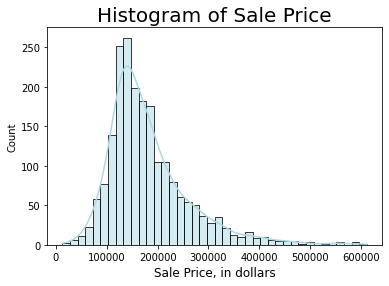

In [14]:
#Visualize skewness of sale price
plt.title(label='Histogram of Sale Price', fontsize=20)
plt.xlabel('Sale Price, in dollars', fontsize=12)
sns.histplot(ames_train['saleprice'], kde=True, bins=40, color='lightblue');

#Our predictions should follow a similar distribution

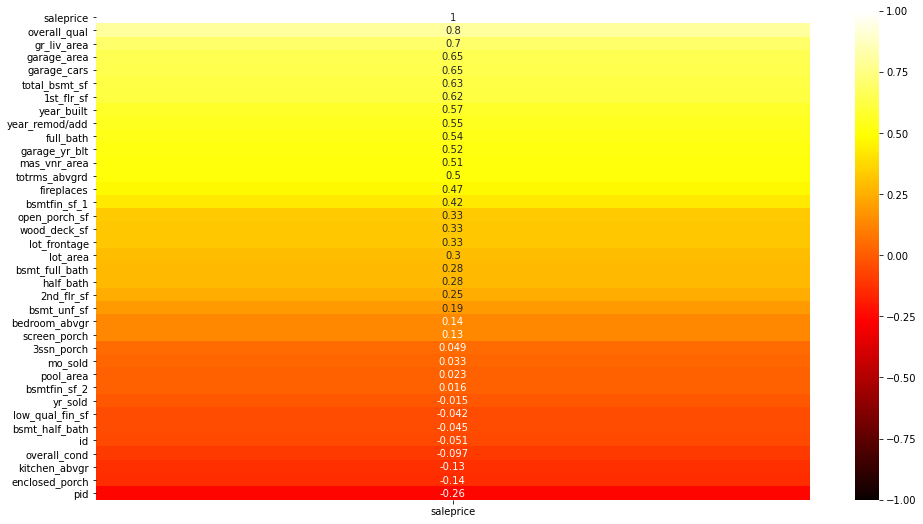

In [15]:
#First, look at a heatmap of 'sales price' compared to all other features
plt.figure(figsize=(16,9))
sns.heatmap(ames_train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
            vmin = -1, vmax = 1,
            cmap = 'hot',
            annot = True);

In [16]:
#Listing of all features
ames_train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False); #the output is hidden for presentation purposes

In [17]:
#Look at highest correlated features to saleprice, could give some insight into if any of these features can be engineered
top_features = ames_train.corr()[['saleprice', 'overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars']].sort_values(by='saleprice', ascending=False).head()
top_features

,saleprice,overall_qual,gr_liv_area,garage_area,garage_cars
saleprice,1.000000,0.800207,0.697038,0.650246,0.648197
overall_qual,0.800207,1.000000,0.566701,0.563731,0.587336
gr_liv_area,0.697038,0.566701,1.000000,0.490897,0.486549
garage_area,0.650246,0.563731,0.490897,1.000000,0.893180
garage_cars,0.648197,0.587336,0.486549,0.893180,1.000000


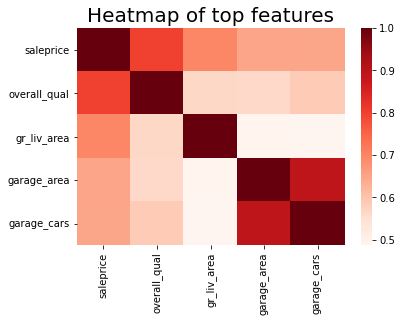

In [18]:
#Visualize top features using heatmap
plt.title('Heatmap of top features', fontsize=20)
sns.heatmap(top_features, cmap='Reds');

In [19]:
#Look at highest correlated features to saleprice, could give some insight into if any of these features can be engineered
total_area = ames_train.corr()[['mas_vnr_area', 'gr_liv_area', 'garage_area']].sort_values(by='mas_vnr_area', ascending=False).head()
total_area

,mas_vnr_area,gr_liv_area,garage_area
mas_vnr_area,1.000000,0.386500,0.382990
saleprice,0.508602,0.697038,0.650246
overall_qual,0.435988,0.566701,0.563731
total_bsmt_sf,0.406349,0.453474,0.488685
1st_flr_sf,0.388562,0.562441,0.498674


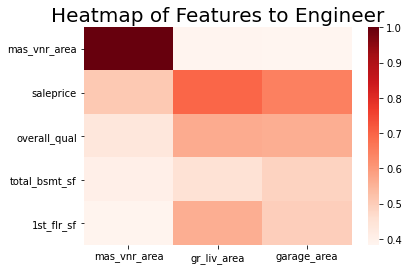

In [20]:
#Visualize correlation using heatmap
plt.title('Heatmap of Features to Engineer', fontsize=20)
sns.heatmap(total_area, cmap='Reds');

In [21]:
#From this insight, we can see that some features (such as area, square footage, etc) should be engineered together

---
# Data mapping, dummifying, and feature engineering

---


##### Per exploratory data analysis, and special notes given on the project text file, there are outliers in the 'gr_liv_area' feature.  In order to best train our model, these rows will be dropped

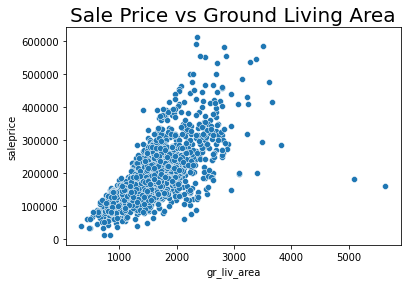

In [22]:
#Visualize where outliers are
plt.title(label='Sale Price vs Ground Living Area', fontsize=20)
sns.scatterplot(x=ames_train['gr_liv_area'], y=ames_train['saleprice']);

In [23]:
#Drop rows in which gr_liv_area is greater than 5000 (outliers), as seen in chart above
ames_train = ames_train.drop(ames_train[ames_train.gr_liv_area > 5000].index)

#### Use data dictionaries to dummify categorical/ordinal features into features with numerical values

In [24]:
#Turn 'yes or no' categorial features into 1's and 0's, using map function
ames_train['central_air'] = ames_train['central_air'].map({'Y':1, 'N':0}) 
ames_train['paved_drive'] = ames_train['paved_drive'].map({'Y':1, 'P':0.5, 'N':0}) 

In [25]:
#Turn ordinal/ranked features into numerical rankings ('poor to excellent scale'), using map function
#Note, after submission of this project, I will turn this cell into a function to more neatly organize this notebook

ames_train['bsmt_qual'] = ames_train['bsmt_qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'None':0})
ames_train['bsmt_cond'] = ames_train['bsmt_cond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'None':0})
ames_train['bsmt_exposure'] = ames_train['bsmt_exposure'].map({'Gd':5, 'Av':3, 'Mn':2, 'No':1, 'NA':0, 'None':0})

ames_train['exter_qual'] = ames_train['exter_qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'None':0})
ames_train['exter_cond'] = ames_train['exter_cond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'None':0})

ames_train['kitchen_qual'] = ames_train['kitchen_qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'None':0})
ames_train['fireplace_qu'] = ames_train['fireplace_qu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'None':0})

ames_train['garage_qual'] = ames_train['garage_qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'None':0})
ames_train['garage_cond'] = ames_train['garage_cond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'None':0})

ames_train['pool_qc'] = ames_train['pool_qc'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'None':0})

In [26]:
#For 'Street' column, turn Pave values into 0 and Grvl values into 1
ames_train['street'] = ames_train['street'].map({'Pave':0, 'Grvl':1}) 

In [27]:
#Double check all nulls are gone
null_columns = ames_train.columns[ames_train.isnull().any()]
ames_train[null_columns].isnull().sum();

### Feature Engineering of Columns

In [28]:
#Engineer a general quality/condition feature
ames_train['general_qual_cond'] = ames_train['overall_qual'] + ames_train['exter_qual']

In [29]:
#Engineer a basement quality/condition feature
ames_train['bsmt_qual_cond'] = ames_train['bsmt_qual'] + ames_train['bsmt_cond'] + ames_train['bsmt_exposure']

In [30]:
#Engineer other qualities feature
ames_train['other_qual'] = ames_train['kitchen_qual'] + ames_train['fireplace_qu']

In [31]:
#Engineer total square footage
ames_train['total_sq_footage'] = ames_train['total_bsmt_sf'] + ames_train['1st_flr_sf'] + ames_train['2nd_flr_sf'] + ames_train['low_qual_fin_sf']

In [32]:
#Engineer total area
ames_train['total_area'] = ames_train['gr_liv_area'] + ames_train['mas_vnr_area'] + ames_train['garage_area'] 

In [33]:
#Engineer 'how_new' feature
ames_train['how_new'] = ames_train['year_built'] + ames_train['year_remod/add']

In [34]:
#Engineer 'total_bath' feature
ames_train['total_bath'] = ames_train['full_bath'] + (0.5 * ames_train['half_bath']) + ames_train['bsmt_full_bath'] + (0.5 * ames_train['bsmt_half_bath'])

In [35]:
#Double check all nulls are gone
null_columns = ames_train.columns[ames_train.isnull().any()]
ames_train[null_columns].isnull().sum();

### Dummify most relevant *nominal* columns/features

In [36]:
#Dummify all desired features
dummy_train = pd.get_dummies(ames_train[['ms_subclass', 'ms_zoning', 'neighborhood', 'bldg_type', 'house_style', 'foundation', 'heating', 'garage_type']],
                             drop_first = True)

### Join dummy dataframe with desired features in training dataframe, to be used for modeling

In [37]:
#First, isolate only desired columns in the training dataframe
to_combine = ames_train[
    ['general_qual_cond', 'bsmt_qual_cond', 'other_qual', 'total_sq_footage', 'total_area', 'how_new', 'total_bath', #engineered features
     'lot_area', 'garage_cars', 'fireplaces', 'totrms_abvgrd']] #other desired features

In [38]:
#Then, combine modified training dataframe above with dummy dataframe (we can append, since the order of the 2051 rows has not changed)
combined_ames_train = pd.concat([dummy_train, to_combine], axis=1)

In [39]:
combined_ames_train.shape

(2049, 85)

### Save the cleaned/engineered training dataframe to be compared to in testing notebook 2

In [40]:
#First, add 'saleprice' and 'id' feature back to training dataframe, as this will be needed for future modeling
combined_ames_train['saleprice'] = ames_train['saleprice']
combined_ames_train['id'] = ames_train['id']

In [41]:
combined_ames_train.to_csv('./final_train_test_csv_files/cleaned_modified_train.csv', index=False)

In [42]:
#Remove 'saleprice' feature from dataframe
combined_ames_train.drop(['saleprice', 'id'], axis=1, inplace=True)